In [197]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import numpy as np
import seaborn as sns
from functools import reduce
%matplotlib inline

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [198]:
# import World Bank and UN TFR data 
wb_tfr_df = pd.read_csv("Resources/API_SP.DYN.TFRT.IN_DS2_en_csv_v2_674456.csv",delimiter=",")
un_tfr_df = pd.read_csv("Resources/WPP2019_Period_Indicators_Medium.csv",delimiter=",")
# display data
wb_tfr_df.head()
#un_tfr_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.768,1.779,1.795,1.813,1.834,1.854,1.872,1.886,NaN,NaN
1,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450,7.450,7.450,7.450,7.450,7.450,...,5.977,5.770,5.562,5.359,5.163,4.976,4.800,4.633,NaN,NaN
2,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.708,6.790,6.872,6.954,7.036,7.116,...,6.194,6.120,6.039,5.953,5.864,5.774,5.686,5.600,NaN,NaN
3,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.489,6.401,6.282,6.133,5.960,5.773,...,1.660,1.673,1.684,1.690,1.688,1.677,1.659,1.638,NaN,NaN
4,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
# transpose wb_tfr_df
wb_tfr_df_transposed = wb_tfr_df.transpose()
# drop unneccessary rows
wb_tfr_df_dropped_rows = wb_tfr_df_transposed.drop(["Country Code","Indicator Name","Indicator Code"])
# redo column headers
# new header
wb_tfr_df_new_headers = wb_tfr_df_dropped_rows.iloc[0]
# take the data less the header row
wb_tfr_df_dropped_rows = wb_tfr_df_dropped_rows[1:]
# set the header row as the df header
wb_tfr_df_dropped_rows.columns = wb_tfr_df_new_headers
# rename axis to "YEAR"
#wb_tfr_df_final = wb_tfr_df_dropped_rows.rename_axis("YEAR")
#wb_tfr_df_final
wb_tfr_df_idx_rst = wb_tfr_df_dropped_rows.reset_index()
wb_tfr_df_idx_rst.head()

Country Name,index,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,1960,4.82,7.45,6.708,6.489,NaN,6.97726,6.929,3.109,4.786,...,5.615,6.348,7.197,4.97931,7.651,NaN,7.938,6.041,7.115,7.158
1,1961,4.655,7.45,6.79,6.401,NaN,6.99863,6.91,3.1,4.67,...,5.651,6.392,7.12,5.00192,7.645,NaN,7.962,6.028,7.169,7.215
2,1962,4.471,7.45,6.872,6.282,NaN,7.01872,6.892,3.09,4.521,...,5.679,6.425,7.033,5.02367,7.63,NaN,7.991,6.01,7.214,7.267
3,1963,4.271,7.45,6.954,6.133,NaN,7.03504,6.875,3.079,4.345,...,5.696,6.448,6.938,5.044,7.604,NaN,8.026,5.986,7.249,7.311
4,1964,4.059,7.45,7.036,5.96,NaN,7.04569,6.857,3.068,4.15,...,5.698,6.464,6.836,5.05491,7.567,NaN,8.067,5.956,7.274,7.347


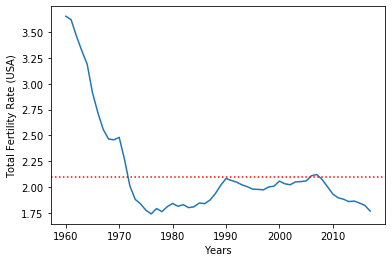

In [200]:
# assign x and y values to prepare to plot graph
tfr_year = wb_tfr_df_idx_rst['index']
usa_tfr = wb_tfr_df_idx_rst['United States']

# plot data using line graph
ax, fig = plt.subplots()
plt.plot(tfr_year, usa_tfr)
plt.xticks([0,10,20,30,40,50])
plt.ylabel('Total Fertility Rate (USA)')
plt.xlabel('Years')

# plot constant replacement rate = 2.1
plt.axhline(y=2.1, color='r', linestyle=':')
plt.show()


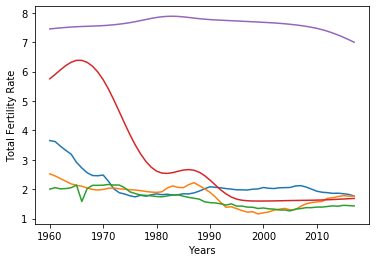

In [201]:
# plot TFR of JAPAN, RUSSIA, CHINA, UK relative to USA
russia_tfr = wb_tfr_df_idx_rst['Russian Federation']
japan_tfr = wb_tfr_df_idx_rst['Japan']
china_tfr = wb_tfr_df_idx_rst['China']
niger_tfr = wb_tfr_df_idx_rst['Niger']
plt.plot(tfr_year, usa_tfr)
plt.plot(tfr_year, russia_tfr)
plt.plot(tfr_year, japan_tfr)
plt.plot(tfr_year, china_tfr)
# Niger for funsies
plt.plot(tfr_year, niger_tfr)
# plot labels
plt.xticks([0,10,20,30,40,50])
plt.ylabel('Total Fertility Rate')
plt.xlabel('Years')
# legends no workie, why?
# plt.legend(shadow=True, fancybox=True)
plt.show()

In [225]:
# male % of male population
male_0_14 = pd.read_csv("Resources/API_SP.POP.0014.MA.ZS_DS2_en_csv_v2_714916.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
male_0_14_new_header = male_0_14.iloc[0]
male_0_14 = male_0_14[1:]
male_0_14.columns = male_0_14_new_header
male_15_19 = pd.read_csv("Resources/API_SP.POP.1519.MA.5Y_DS2_en_csv_v2_718675.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
male_15_19_new_header = male_15_19.iloc[0]
male_15_19 = male_15_19[1:]
male_15_19.columns = male_15_19_new_header
male_20_24 = pd.read_csv("Resources/API_SP.POP.2024.MA.5Y_DS2_en_csv_v2_718685.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
male_20_24_new_header = male_20_24.iloc[0]
male_20_24 = male_20_24[1:]
male_20_24.columns = male_20_24_new_header
male_25_29 = pd.read_csv("Resources/API_SP.POP.2529.MA.5Y_DS2_en_csv_v2_718687.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
male_25_29_new_header = male_25_29.iloc[0]
male_25_29 = male_25_29[1:]
male_25_29.columns = male_25_29_new_header
male_30_34 = pd.read_csv("Resources/API_SP.POP.3034.MA.5Y_DS2_en_csv_v2_718689.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
male_30_34_new_header = male_30_34.iloc[0]
male_30_34 = male_30_34[1:]
male_30_34.columns = male_30_34_new_header
male_35_39 = pd.read_csv("Resources/API_SP.POP.3539.MA.5Y_DS2_en_csv_v2_718693.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
male_35_39_new_header = male_35_39.iloc[0]
male_35_39 = male_35_39[1:]
male_35_39.columns = male_35_39_new_header
male_40_44 = pd.read_csv("Resources/API_SP.POP.4044.MA.5Y_DS2_en_csv_v2_718696.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
male_40_44_new_header = male_40_44.iloc[0]
male_40_44 = male_40_44[1:]
male_40_44.columns = male_40_44_new_header
male_45_49 = pd.read_csv("Resources/API_SP.POP.4549.MA.5Y_DS2_en_csv_v2_718698.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
male_45_49_new_header = male_45_49.iloc[0]
male_45_49 = male_45_49[1:]
male_45_49.columns = male_45_49_new_header
male_50_54 = pd.read_csv("Resources/API_SP.POP.5054.MA.5Y_DS2_en_csv_v2_718700.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
male_50_54_new_header = male_50_54.iloc[0]
male_50_54 = male_50_54[1:]
male_50_54.columns = male_50_54_new_header
male_55_59 = pd.read_csv("Resources/API_SP.POP.5559.MA.5Y_DS2_en_csv_v2_718702.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
male_55_59_new_header = male_55_59.iloc[0]
male_55_59 = male_55_59[1:]
male_55_59.columns = male_55_59_new_header
male_60_64 = pd.read_csv("Resources/API_SP.POP.6064.MA.5Y_DS2_en_csv_v2_718705.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
male_60_64_new_header = male_60_64.iloc[0]
male_60_64 = male_60_64[1:]
male_60_64.columns = male_60_64_new_header
male_65_69 = pd.read_csv("Resources/API_SP.POP.6569.MA.5Y_DS2_en_csv_v2_718707.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
male_65_69_new_header = male_65_69.iloc[0]
male_65_69 = male_65_69[1:]
male_65_69.columns = male_65_69_new_header
male_70_74 = pd.read_csv("Resources/API_SP.POP.7074.MA.5Y_DS2_en_csv_v2_718719.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
male_70_74_new_header = male_70_74.iloc[0]
male_70_74 = male_70_74[1:]
male_70_74.columns = male_70_74_new_header
male_75_79 = pd.read_csv("Resources/API_SP.POP.7579.MA.5Y_DS2_en_csv_v2_718722.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
male_75_79_new_header = male_75_79.iloc[0]
male_75_79 = male_75_79[1:]
male_75_79.columns = male_75_79_new_header
male_80_UP = pd.read_csv("Resources/API_SP.POP.80UP.MA.5Y_DS2_en_csv_v2_718724.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
male_80_UP_new_header = male_80_UP.iloc[0]
male_80_UP = male_80_UP[1:]
male_80_UP.columns = male_80_UP_new_header
#female
female_0_14 = pd.read_csv("Resources/API_SP.POP.0014.FE.ZS_DS2_en_csv_v2_714935.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
female_0_14_new_header = female_0_14.iloc[0]
female_0_14 = female_0_14[1:]
female_0_14.columns = female_0_14_new_header
female_15_19 = pd.read_csv("Resources/API_SP.POP.1519.FE.5Y_DS2_en_csv_v2_718674.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
female_15_19_new_header = female_15_19.iloc[0]
female_15_19 = female_15_19[1:]
female_15_19.columns = female_15_19_new_header
female_20_24 = pd.read_csv("Resources/API_SP.POP.2024.FE.5Y_DS2_en_csv_v2_718684.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
female_20_24_new_header = female_20_24.iloc[0]
female_20_24 = female_20_24[1:]
female_20_24.columns = female_20_24_new_header
female_25_29 = pd.read_csv("Resources/API_SP.POP.2529.FE.5Y_DS2_en_csv_v2_718686.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
female_25_29_new_header = female_25_29.iloc[0]
female_25_29 = female_25_29[1:]
female_25_29.columns = female_25_29_new_header
female_30_34 = pd.read_csv("Resources/API_SP.POP.3034.FE.5Y_DS2_en_csv_v2_718688.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
female_30_34_new_header = female_30_34.iloc[0]
female_30_34 = female_30_34[1:]
female_30_34.columns = female_30_34_new_header
female_35_39 = pd.read_csv("Resources/API_SP.POP.3539.FE.5Y_DS2_en_csv_v2_718691.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
female_35_39_new_header = female_35_39.iloc[0]
female_35_39 = female_35_39[1:]
female_35_39.columns = female_35_39_new_header
female_40_44 = pd.read_csv("Resources/API_SP.POP.4044.FE.5Y_DS2_en_csv_v2_718694.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
female_40_44_new_header = female_40_44.iloc[0]
female_40_44 = female_40_44[1:]
female_40_44.columns = female_40_44_new_header
female_45_49 = pd.read_csv("Resources/API_SP.POP.4549.FE.5Y_DS2_en_csv_v2_718697.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
female_45_49_new_header = female_45_49.iloc[0]
female_45_49 = female_45_49[1:]
female_45_49.columns = female_45_49_new_header
female_50_54 = pd.read_csv("Resources/API_SP.POP.5054.FE.5Y_DS2_en_csv_v2_718699.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
female_50_54_new_header = female_50_54.iloc[0]
female_50_54 = female_50_54[1:]
female_50_54.columns = female_50_54_new_header
female_55_59 = pd.read_csv("Resources/API_SP.POP.5559.FE.5Y_DS2_en_csv_v2_718701.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
female_55_59_new_header = female_55_59.iloc[0]
female_55_59 = female_55_59[1:]
female_55_59.columns = female_55_59_new_header
female_60_64 = pd.read_csv("Resources/API_SP.POP.6064.FE.5Y_DS2_en_csv_v2_718703.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
female_60_64_new_header = female_60_64.iloc[0]
female_60_64 = female_60_64[1:]
female_60_64.columns = female_60_64_new_header
female_65_69 = pd.read_csv("Resources/API_SP.POP.6569.FE.5Y_DS2_en_csv_v2_727752.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
female_65_69_new_header = female_65_69.iloc[0]
female_65_69 = female_65_69[1:]
female_65_69.columns = female_65_69_new_header
female_70_74 = pd.read_csv("Resources/API_SP.POP.7074.FE.5Y_DS2_en_csv_v2_718718.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
female_70_74_new_header = female_70_74.iloc[0]
female_70_74 = female_70_74[1:]
female_70_74.columns = female_70_74_new_header
female_75_79 = pd.read_csv("Resources/API_SP.POP.7579.FE.5Y_DS2_en_csv_v2_718721.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
female_75_79_new_header = female_75_79.iloc[0]
female_75_79 = female_75_79[1:]
female_75_79.columns = female_75_79_new_header
female_80_UP = pd.read_csv("Resources/API_SP.POP.80UP.FE.5Y_DS2_en_csv_v2_718723.csv").transpose().drop(["Country Code","Indicator Name","Indicator Code"])
female_80_UP_new_header = female_80_UP.iloc[0]
female_80_UP = female_80_UP[1:]
female_80_UP.columns = female_80_UP_new_header
#usa_female_80_UP = female_80_UP[['United States']].reset_index()
#usa_female_80_UP_renamed = usa_female_80_UP.rename(columns={'Country Name':'id','index':'YEAR','United States':'% of female 80+'})
#usa_female_80_UP_renamed
usa_male_0_14 = male_0_14[['United States']].reset_index()
usa_male_15_19 = male_15_19[['United States']].reset_index()
usa_male_20_24 = male_20_24[['United States']].reset_index()
usa_male_25_29 = male_25_29[['United States']].reset_index()
usa_male_30_34 = male_30_34[['United States']].reset_index()
usa_male_35_39 = male_35_39[['United States']].reset_index()
usa_male_40_44 = male_40_44[['United States']].reset_index()
usa_male_45_49 = male_45_49[['United States']].reset_index()
usa_male_50_54 = male_50_54[['United States']].reset_index()
usa_male_55_59 = male_55_59[['United States']].reset_index()
usa_male_60_64 = male_60_64[['United States']].reset_index()
usa_male_65_69 = male_65_69[['United States']].reset_index()
usa_male_70_74 = male_70_74[['United States']].reset_index()
usa_male_75_79 = male_75_79[['United States']].reset_index()
usa_male_80_UP = male_80_UP[['United States']].reset_index()
usa_female_0_14 = female_0_14[['United States']].reset_index()
usa_female_15_19 = female_15_19[['United States']].reset_index()
usa_female_20_24 = female_20_24[['United States']].reset_index()
usa_female_25_29 = female_25_29[['United States']].reset_index()
usa_female_30_34 = female_30_34[['United States']].reset_index()
usa_female_35_39 = female_35_39[['United States']].reset_index()
usa_female_40_44 = female_40_44[['United States']].reset_index()
usa_female_45_49 = female_45_49[['United States']].reset_index()
usa_female_50_54 = female_50_54[['United States']].reset_index()
usa_female_55_59 = female_55_59[['United States']].reset_index()
usa_female_60_64 = female_60_64[['United States']].reset_index()
usa_female_65_69 = female_65_69[['United States']].reset_index()
usa_female_70_74 = female_70_74[['United States']].reset_index()
usa_female_75_79 = female_75_79[['United States']].reset_index()
usa_female_80_UP = female_80_UP[['United States']].reset_index()

usa_male_female_df = [usa_male_0_14.rename(columns={'United States':'Male (0 - 14)'}), 
                      usa_male_15_19.rename(columns={'United States':'Male (15 - 19)'}), 
                      usa_male_20_24.rename(columns={'United States':'Male (20 - 24)'}), 
                      usa_male_25_29.rename(columns={'United States':'Male (25 - 29)'}), 
                      usa_male_30_34.rename(columns={'United States':'Male (30 - 34)'}),
                      usa_male_35_39.rename(columns={'United States':'Male (35 - 39)'}), 
                      usa_male_40_44.rename(columns={'United States':'Male (40 - 44)'}), 
                      usa_male_45_49.rename(columns={'United States':'Male (45 - 49)'}), 
                      usa_male_50_54.rename(columns={'United States':'Male (50 - 54)'}), 
                      usa_male_55_59.rename(columns={'United States':'Male (55 - 59)'}),
                      usa_male_60_64.rename(columns={'United States':'Male (60 - 64)'}), 
                      usa_male_65_69.rename(columns={'United States':'Male (65 - 69)'}), 
                      usa_male_70_74.rename(columns={'United States':'Male (70 - 74)'}), 
                      usa_male_75_79.rename(columns={'United States':'Male (75 - 79)'}), 
                      usa_male_80_UP.rename(columns={'United States':'Male (80 & UP)'}),
                      usa_female_0_14.rename(columns={'United States':'Female (0 - 14)'}), 
                      usa_female_15_19.rename(columns={'United States':'Female (15 - 19)'}), 
                      usa_female_20_24.rename(columns={'United States':'Female (20 - 24)'}), 
                      usa_female_25_29.rename(columns={'United States':'Female (25 - 29)'}), 
                      usa_female_30_34.rename(columns={'United States':'Female (30 - 34)'}),
                      usa_female_35_39.rename(columns={'United States':'Female (35 - 39)'}), 
                      usa_female_40_44.rename(columns={'United States':'Female (40 - 44)'}), 
                      usa_female_45_49.rename(columns={'United States':'Female (45 - 49)'}), 
                      usa_female_50_54.rename(columns={'United States':'Female (50 - 54)'}), 
                      usa_female_55_59.rename(columns={'United States':'Female (55 - 59)'}),
                      usa_female_60_64.rename(columns={'United States':'Female (60 - 64)'}), 
                      usa_female_65_69.rename(columns={'United States':'Female (65 - 69)'}), 
                      usa_female_70_74.rename(columns={'United States':'Female (70 - 74)'}), 
                      usa_female_75_79.rename(columns={'United States':'Female (75 - 79)'}), 
                      usa_female_80_UP.rename(columns={'United States':'Female (80 & UP)'})]
male_female_df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['index'],
                                            how='outer'), usa_male_female_df)
male_female_df_merged

Country Name,index,Male (0 - 14),Male (15 - 19),Male (20 - 24),Male (25 - 29),Male (30 - 34),Male (35 - 39),Male (40 - 44),Male (45 - 49),Male (50 - 54),...,Female (35 - 39),Female (40 - 44),Female (45 - 49),Female (50 - 54),Female (55 - 59),Female (60 - 64),Female (65 - 69),Female (70 - 74),Female (75 - 79),Female (80 & UP)
0,1960,31.6295,7.51998,6.20607,6.21478,6.68399,6.92155,6.42689,6.01433,5.43991,...,6.8631,6.39792,6.05048,5.61753,5.11763,4.26022,3.60394,2.75778,1.99167,1.66168
1,1961,31.7568,7.78273,6.30699,6.09009,6.49513,6.81921,6.41162,5.96935,5.42013,...,6.75814,6.38453,5.99245,5.60266,5.10382,4.28331,3.60532,2.78183,2.00103,1.74937
2,1962,31.7193,8.07932,6.44755,6.00483,6.32372,6.69317,6.42442,5.9255,5.4182,...,6.62791,6.3968,5.93984,5.58731,5.0981,4.32317,3.60136,2.82439,2.00553,1.82878
3,1963,31.5564,8.38877,6.61336,5.9664,6.1734,6.54935,6.44595,5.89158,5.41915,...,6.47612,6.41408,5.90369,5.55926,5.11002,4.3667,3.60041,2.87492,2.01782,1.89414
4,1964,31.3272,8.67319,6.79989,5.9771,6.04637,6.39956,6.44802,5.8762,5.41359,...,6.30965,6.409,5.88961,5.51916,5.13556,4.40423,3.61216,2.92157,2.04689,1.94117
5,1965,31.0611,8.90909,7.01172,6.02969,5.94584,6.25486,6.41484,5.88122,5.40324,...,6.13586,6.36738,5.89477,5.47901,5.15978,4.43904,3.63924,2.95976,2.09288,1.97168
6,1966,30.7645,9.01982,7.29607,6.12412,5.85238,6.12515,6.36112,5.90597,5.38538,...,5.96651,6.29817,5.91093,5.46028,5.12647,4.49179,3.66763,2.96359,2.12543,2.06678
7,1967,30.4367,9.1155,7.55466,6.26824,5.79352,5.99101,6.28088,5.95155,5.37487,...,5.79167,6.20178,5.9414,5.45053,5.08767,4.53522,3.71953,2.96338,2.16218,2.14599
8,1968,30.0676,9.24115,7.74862,6.45813,5.7791,5.85465,6.18164,6.00119,5.37363,...,5.62272,6.08334,5.97367,5.4455,5.05868,4.55881,3.79064,2.96749,2.1997,2.21076
9,1969,29.6522,9.40793,7.87875,6.67202,5.81473,5.7285,6.07303,6.03216,5.38848,...,5.47712,5.95125,5.98728,5.44807,5.0473,4.56276,3.86805,2.98816,2.23403,2.26322


In [290]:

usa_male_15_44_list = (male_female_df_merged['Male (15 - 19)']+
                  male_female_df_merged['Male (20 - 24)']+
                  male_female_df_merged['Male (25 - 29)']+
                  male_female_df_merged['Male (30 - 34)']+
                  male_female_df_merged['Male (35 - 39)']+
                  male_female_df_merged['Male (40 - 44)'])

usa_female_0_14_list = (male_female_df_merged['Female (0 - 14)'])

usa_female_15_44_list = (male_female_df_merged['Female (15 - 19)']+
                         male_female_df_merged['Female (20 - 24)']+
                         male_female_df_merged['Female (25 - 29)']+
                         male_female_df_merged['Female (30 - 34)']+
                         male_female_df_merged['Female (35 - 39)']+
                         male_female_df_merged['Female (40 - 44)'])

usa_female_45_UP_list = (male_female_df_merged['Female (45 - 49)']+
                         male_female_df_merged['Female (50 - 54)']+
                         male_female_df_merged['Female (55 - 59)']+
                         male_female_df_merged['Female (60 - 64)']+
                         male_female_df_merged['Female (65 - 69)']+
                         male_female_df_merged['Female (70 - 74)']+
                         male_female_df_merged['Female (75 - 79)']+
                         male_female_df_merged['Female (80 & UP)'])

usa_female_0_14 = pd.DataFrame(usa_female_0_14_list)
usa_female_15_44 = pd.DataFrame(usa_female_15_44_list)
usa_female_45_UP = pd.DataFrame(usa_female_45_UP_list)
year_column = pd.DataFrame(male_female_df_merged['index'])

usa_female_summary_df = pd.concat([year_column.rename(columns={'index':'Year'}), 
                                   usa_female_0_14,
                                   usa_female_15_44.rename(columns={0:'Female (15 - 44)'}),
                                   usa_female_45_UP.rename(columns={0:'Female (45 & UP)'})], axis=1)
droppedna_df = usa_female_summary_df.dropna()
droppedna_df

,Year,Female (0 - 14),Female (15 - 44),Female (45 & UP)
0,1960,29.7696,39.1695,31.0609
1,1961,29.8662,39.014,31.1198
2,1962,29.8045,38.987,31.2085
3,1963,29.624,39.049,31.327
4,1964,29.3794,39.1502,31.4704
5,1965,29.0964,39.2674,31.6362
6,1966,28.7564,39.4307,31.8129
7,1967,28.3814,39.6127,32.0059
8,1968,27.9727,39.822,32.2053
9,1969,27.5234,40.0778,32.3989


Text(0.5, 1.0, 'US Females Only')

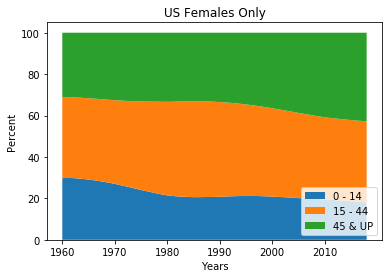

In [307]:
x = droppedna_df['Year']
y = [droppedna_df['Female (0 - 14)'].astype(float),
    droppedna_df['Female (15 - 44)'].astype(float),
    droppedna_df['Female (45 & UP)'].astype(float)]
plt.stackplot(x,y, labels = ['0 - 14','15 - 44','45 & UP'])
plt.xticks([0,10,20,30,40,50])
plt.ylabel('Percent')
plt.xlabel('Years')
plt.legend(loc='lower right')
plt.title('US Females Only')